In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


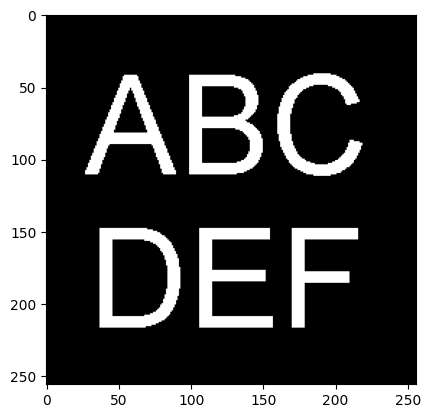

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/abcdef.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap='gray')

In [3]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

In [4]:
gPoint = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

(256, 256, 3)


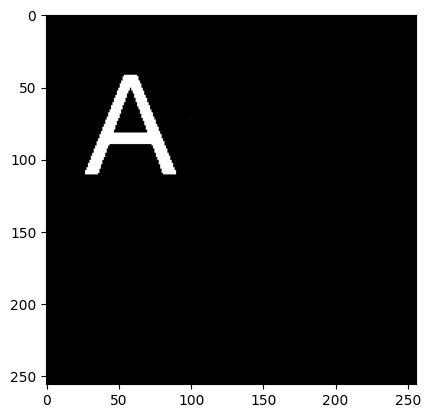

In [5]:
img = cv2.imread('/content/gdrive/My Drive/images/a.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg2, cmap='gray')

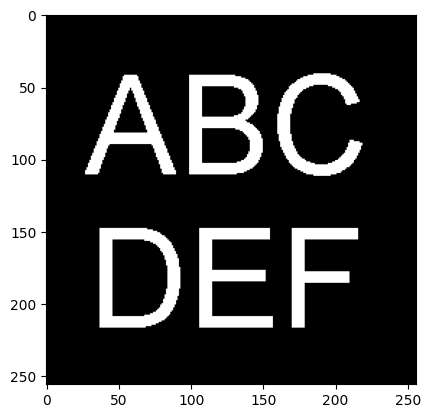

In [7]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    #pointVal = np.int32(gimg1[h,w]) & np.int32(gimg2[h,w])
    pointVal = np.int32(gimg1[h,w]) | np.int32(gimg2[h,w])
    gPoint[h,w] = saturation(pointVal)

plt.imshow(gPoint, cmap='gray')

(256, 256, 3)


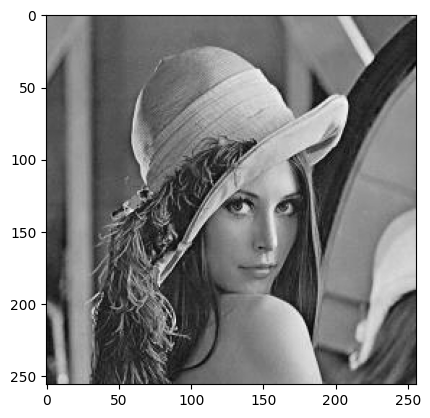

In [8]:
img = cv2.imread('/content/gdrive/My Drive/images/lena256.jpg')
print(img.shape)
gimg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg2, cmap='gray')

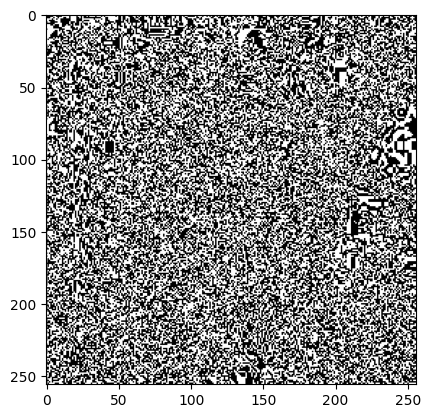

In [12]:
planeNum = 2
planeValue = 1

for i in range(planeNum-1):
  planeValue *= 2

for h in range(gimg2.shape[0]):
  for w in range(gimg2.shape[1]):
    imValue = gimg2[h,w]
    imValue = (int)(imValue/planeValue);
    if(imValue % 2 == 0):
      imValue = 0
    else:
      imValue = 255
    gPoint[h,w] = imValue

plt.imshow(gPoint, cmap='gray')

In [13]:
gWaterMarker = gimg2.copy()

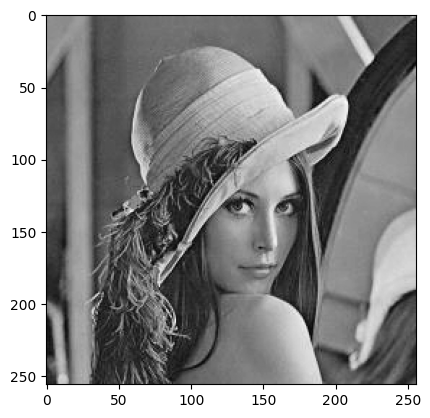

In [16]:
for h in range(gimg2.shape[0]):
  for w in range(gimg2.shape[1]):
    imValue = gimg1[h,w]
    if(imValue >= 128):
      if(gWaterMarker[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
    else:
      if(gWaterMarker[h,w] % 2 == 1):
        gWaterMarker[h,w] -= 1

plt.imshow(gWaterMarker, cmap='gray')